# MUW Neuroscience Seminar WS 23/24

## Group Work: CAL MS21 Dataset

## Project Goal

* Find out, if ML classifying can help in annotating the frames
* A tab dataset of the mice coordinates is used
* Several methods are tested against a dummy classifier as baseline

## Literature

* S. Raschka & V. Mirjalili (2018) Datenvorverarbeitung. In: S. Raschka & V. Mirjalili. Machine Learning with Python and Scikit-earn and TensorFlow. S. 125-158 (Kapitel 4)
* A. Famili et al (1997) Data Preprocessing and Intelligent Data Analysis. In: Intelligent Data Analysis Journal

## 1 | Checking the data

Usage of several python libraries:
- pandas, numpy
- sklearn (scikit-learn)

Dataset has been preprocessed separately, see parallel notebook.

In [3]:
# libraries

from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np

## 1.1 Load the preprocessed dataset

In the dataset, there is one row/record for each frame containing the coordinates for each mouse bodypart as features.
Statistical description displayed below and preview of data structure below.

In [4]:
df_data = pd.read_csv('data/calms21_tab_data.csv') #check for the location of this file in your scenario
df_data.describe(include='all')

,Unnamed: 0,sequence,frame,id,label,m1_x_nose,m1_x_left_ear,m1_x_right_ear,m1_x_neck,m1_x_left_hip,...,m2_x_right_hip,m2_x_tail_base,m2_y_nose,m2_y_left_ear,m2_y_right_ear,m2_y_neck,m2_y_left_hip,m2_y_right_hip,m2_y_tail_base,attack
count,507738.000000,507738,507738.000000,507738,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,...,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000
unique,NaN,70,NaN,507738,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,task1/train/mouse001_task1_annotator1,NaN,task1/train/mouse001_task1_annotator10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21364,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,253868.500000,NaN,5694.667001,NaN,2.283170,498.981251,492.330323,498.293024,494.084736,485.628505,...,528.236839,526.511264,329.748869,332.345046,329.677917,331.250143,335.278646,331.464391,334.243921,0.027650
std,146571.479826,NaN,4721.565589,NaN,0.972836,276.277653,271.113108,272.273444,270.336755,265.768457,...,276.762300,276.961196,130.553673,127.718573,127.443641,125.596338,129.200753,129.353404,134.293177,0.163968
min,0.000000,NaN,0.000000,NaN,0.000000,0.000000,11.000000,32.000000,50.000000,11.000000,...,24.573660,12.000000,0.000000,10.000000,19.000000,54.000000,23.000000,35.000000,17.000000,0.000000
25%,126934.250000,NaN,1907.000000,NaN,1.000000,228.257655,211.394948,215.392818,208.979365,216.654578,...,239.425223,252.320353,220.132083,216.393679,211.892586,211.618877,218.881433,211.845849,208.543972,0.000000
50%,253868.500000,NaN,4374.000000,NaN,3.000000,503.394354,506.396939,505.847574,505.353545,502.474588,...,567.295091,564.528696,339.796427,350.923986,343.092039,351.253515,358.677518,348.005436,346.671118,0.000000
75%,380802.750000,NaN,8374.000000,NaN,3.000000,772.395674,766.282243,775.290410,770.861516,744.781598,...,796.357602,793.945117,442.006255,448.290094,445.031193,450.738161,449.826209,443.011136,462.314209,0.000000


In [5]:
df_data.head(10)

,Unnamed: 0,sequence,frame,id,label,m1_x_nose,m1_x_left_ear,m1_x_right_ear,m1_x_neck,m1_x_left_hip,...,m2_x_right_hip,m2_x_tail_base,m2_y_nose,m2_y_left_ear,m2_y_right_ear,m2_y_neck,m2_y_left_hip,m2_y_right_hip,m2_y_tail_base,attack
0,0,task1/train/mouse001_task1_annotator1,0,task1/train/mouse001_task1_annotator10,3,831.659204,805.659204,775.659204,780.659204,711.659204,...,840.915924,766.915924,253.216902,195.216902,193.216902,179.216902,152.216902,102.216902,97.216902,0
1,1,task1/train/mouse001_task1_annotator1,1,task1/train/mouse001_task1_annotator11,1,833.050439,809.050439,778.050439,783.050439,723.050439,...,846.907019,766.907019,259.539977,204.539977,201.539977,188.539977,153.539977,105.539977,98.539977,0
2,2,task1/train/mouse001_task1_annotator1,2,task1/train/mouse001_task1_annotator12,1,838.718976,816.718976,776.718976,787.718976,730.718976,...,860.195703,777.195703,256.902935,208.902935,205.902935,193.902935,150.902935,112.902935,99.902935,0
3,3,task1/train/mouse001_task1_annotator1,3,task1/train/mouse001_task1_annotator13,1,826.757507,815.757507,774.757507,785.757507,743.757507,...,856.788861,786.788861,263.420539,206.420539,206.420539,193.420539,147.420539,113.420539,97.420539,0
4,4,task1/train/mouse001_task1_annotator1,4,task1/train/mouse001_task1_annotator14,1,822.045709,812.045709,768.045709,779.045709,749.045709,...,862.578644,793.578644,263.366469,202.366469,201.366469,190.366469,143.366469,120.366469,95.366469,0
5,5,task1/train/mouse001_task1_annotator1,5,task1/train/mouse001_task1_annotator15,1,818.778436,809.778436,761.778436,776.778436,741.778436,...,857.949255,791.949255,264.656704,198.656704,198.656704,189.656704,141.656704,116.656704,92.656704,0
6,6,task1/train/mouse001_task1_annotator1,6,task1/train/mouse001_task1_annotator16,1,806.099103,809.099103,757.099103,776.099103,743.099103,...,853.259283,791.259283,263.464866,202.464866,198.464866,190.464866,142.464866,116.464866,93.464866,0
7,7,task1/train/mouse001_task1_annotator1,7,task1/train/mouse001_task1_annotator17,1,803.039594,803.039594,752.039594,773.039594,733.039594,...,850.518365,790.518365,262.897428,198.897428,195.897428,187.897428,139.897428,114.897428,91.897428,0
8,8,task1/train/mouse001_task1_annotator1,8,task1/train/mouse001_task1_annotator18,1,800.631812,796.631812,747.631812,765.631812,724.631812,...,843.835266,787.835266,263.704107,196.704107,194.704107,187.704107,139.704107,110.704107,90.704107,0
9,9,task1/train/mouse001_task1_annotator1,9,task1/train/mouse001_task1_annotator19,1,800.814734,795.814734,746.814734,763.814734,726.814734,...,840.120172,787.120172,258.511888,194.511888,196.511888,186.511888,140.511888,109.511888,89.511888,0


The columns sequence and frame would actually not be meaningful data, we can drop them from the dataset or later not use in the feature list.

In [6]:
df_data = df_data.drop(columns=['Unnamed: 0', 'sequence', 'frame'])
df_data.head(1)

,id,label,m1_x_nose,m1_x_left_ear,m1_x_right_ear,m1_x_neck,m1_x_left_hip,m1_x_right_hip,m1_x_tail_base,m1_y_nose,...,m2_x_right_hip,m2_x_tail_base,m2_y_nose,m2_y_left_ear,m2_y_right_ear,m2_y_neck,m2_y_left_hip,m2_y_right_hip,m2_y_tail_base,attack
0,task1/train/mouse001_task1_annotator10,3,831.659204,805.659204,775.659204,780.659204,711.659204,711.659204,643.659204,202.914433,...,840.915924,766.915924,253.216902,195.216902,193.216902,179.216902,152.216902,102.216902,97.216902,0


In [7]:
df_data.describe(include='all')

,id,label,m1_x_nose,m1_x_left_ear,m1_x_right_ear,m1_x_neck,m1_x_left_hip,m1_x_right_hip,m1_x_tail_base,m1_y_nose,...,m2_x_right_hip,m2_x_tail_base,m2_y_nose,m2_y_left_ear,m2_y_right_ear,m2_y_neck,m2_y_left_hip,m2_y_right_hip,m2_y_tail_base,attack
count,507738,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,...,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000,507738.000000
unique,507738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,task1/train/mouse001_task1_annotator10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.283170,498.981251,492.330323,498.293024,494.084736,485.628505,494.056763,486.062736,316.323761,...,528.236839,526.511264,329.748869,332.345046,329.677917,331.250143,335.278646,331.464391,334.243921,0.027650
std,NaN,0.972836,276.277653,271.113108,272.273444,270.336755,265.768457,266.441908,264.953242,126.095533,...,276.762300,276.961196,130.553673,127.718573,127.443641,125.596338,129.200753,129.353404,134.293177,0.163968
min,NaN,0.000000,0.000000,11.000000,32.000000,50.000000,11.000000,38.490309,0.000000,6.000000,...,24.573660,12.000000,0.000000,10.000000,19.000000,54.000000,23.000000,35.000000,17.000000,0.000000
25%,NaN,1.000000,228.257655,211.394948,215.392818,208.979365,216.654578,223.686047,224.823090,208.243571,...,239.425223,252.320353,220.132083,216.393679,211.892586,211.618877,218.881433,211.845849,208.543972,0.000000
50%,NaN,3.000000,503.394354,506.396939,505.847574,505.353545,502.474588,505.035722,501.617735,312.861399,...,567.295091,564.528696,339.796427,350.923986,343.092039,351.253515,358.677518,348.005436,346.671118,0.000000
75%,NaN,3.000000,772.395674,766.282243,775.290410,770.861516,744.781598,749.365298,726.977702,427.954780,...,796.357602,793.945117,442.006255,448.290094,445.031193,450.738161,449.826209,443.011136,462.314209,0.000000


### 1.2. Unbalanced label distribution
The problem could be a multi label classification to predict all 4 annotated behaviours.
For a first step we focus on a binary classification problem and just predict attach.

In either case, we can see, that the label to predict is a minority class and we will have to accomodate this in the hyperparameters and in the chosen metrics for evaluation.

In [8]:
df_data['label'].value_counts()

label
3    318469
1    146615
2     28615
0     14039
Name: count, dtype: int64

In [9]:
df_data['attack'].value_counts()

attack
0    493699
1     14039
Name: count, dtype: int64

## 2 | Data characteristics

### 2.1 Data Correlations

Getting a quick overview of correlations between the different columns.

In [11]:
df_data.corr(numeric_only=True)

,label,m1_x_nose,m1_x_left_ear,m1_x_right_ear,m1_x_neck,m1_x_left_hip,m1_x_right_hip,m1_x_tail_base,m1_y_nose,m1_y_left_ear,...,m2_x_right_hip,m2_x_tail_base,m2_y_nose,m2_y_left_ear,m2_y_right_ear,m2_y_neck,m2_y_left_hip,m2_y_right_hip,m2_y_tail_base,attack
label,1.000000,-0.075369,-0.076983,-0.074854,-0.076243,-0.074644,-0.071906,-0.070846,-0.064691,-0.072435,...,-0.003647,0.001767,0.014134,0.019413,0.019515,0.021374,0.023343,0.031464,0.028882,-0.395764
m1_x_nose,-0.075369,1.000000,0.987645,0.987697,0.983617,0.921389,0.921539,0.856943,0.057136,0.090621,...,0.252900,0.228973,0.066398,0.078335,0.052816,0.065663,0.084013,0.025346,0.045457,-0.019784
m1_x_left_ear,-0.076983,0.987645,1.000000,0.990216,0.996500,0.966327,0.954124,0.912945,0.035383,0.062652,...,0.225049,0.201356,0.047568,0.059832,0.032135,0.045851,0.067058,0.007016,0.029947,-0.016054
m1_x_right_ear,-0.074854,0.987697,0.990216,1.000000,0.996595,0.954226,0.966091,0.913080,0.090421,0.084450,...,0.226166,0.203263,0.078874,0.094227,0.067466,0.081652,0.100654,0.042367,0.062398,-0.018937
m1_x_neck,-0.076243,0.983617,0.996500,0.996595,1.000000,0.972185,0.972100,0.930804,0.065093,0.068501,...,0.216205,0.193026,0.062580,0.077117,0.049202,0.063600,0.084473,0.024886,0.046983,-0.016659
m1_x_left_hip,-0.074644,0.921389,0.966327,0.954226,0.972185,1.000000,0.981617,0.981672,0.028742,0.017462,...,0.160805,0.137961,0.034164,0.049020,0.017631,0.033330,0.057875,-0.003292,0.022647,-0.010745
m1_x_right_hip,-0.071906,0.921539,0.954124,0.966091,0.972100,0.981617,1.000000,0.981831,0.117498,0.066528,...,0.165831,0.144079,0.078650,0.098026,0.067870,0.084416,0.106545,0.047642,0.069887,-0.014653
m1_x_tail_base,-0.070846,0.856943,0.912945,0.913080,0.930804,0.981672,0.981831,1.000000,0.077503,0.021960,...,0.119468,0.097980,0.049817,0.068566,0.035580,0.052919,0.078005,0.017949,0.043516,-0.009018
m1_y_nose,-0.064691,0.057136,0.035383,0.090421,0.065093,0.028742,0.117498,0.077503,1.000000,0.948661,...,-0.027684,-0.032469,0.287449,0.310674,0.296926,0.309882,0.305367,0.287233,0.284447,0.009689
m1_y_left_ear,-0.072435,0.090621,0.062652,0.084450,0.068501,0.017462,0.066528,0.021960,0.948661,1.000000,...,0.002929,-0.004253,0.246329,0.263983,0.249184,0.261402,0.261807,0.238766,0.241811,0.013187


Summary comments on correlations.
High correlation between same Mouse' nose, ears and neck, a little less for tail.
It might make sense to reduce the number of features per mouse to nose and tail.

## 2.2 Descriptive Statistic

Add some more details.

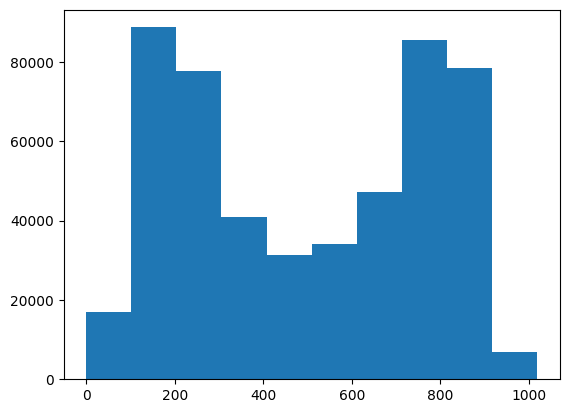

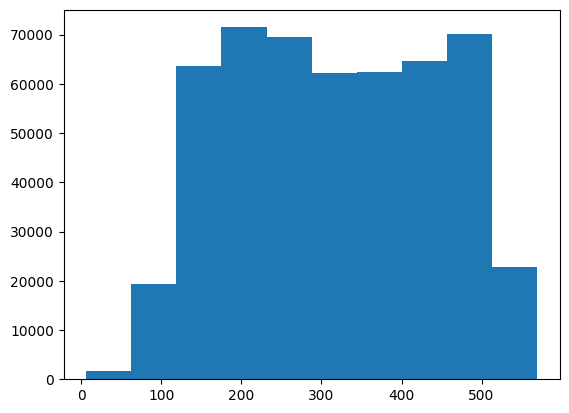

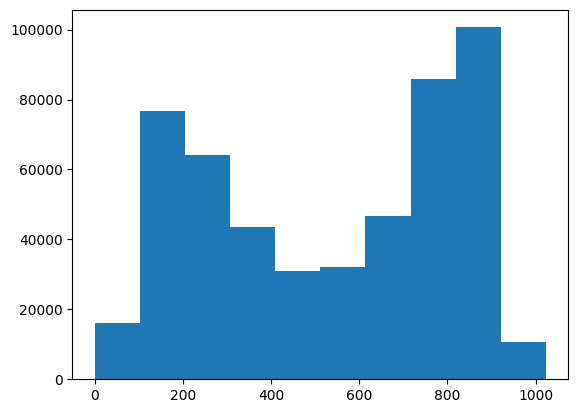

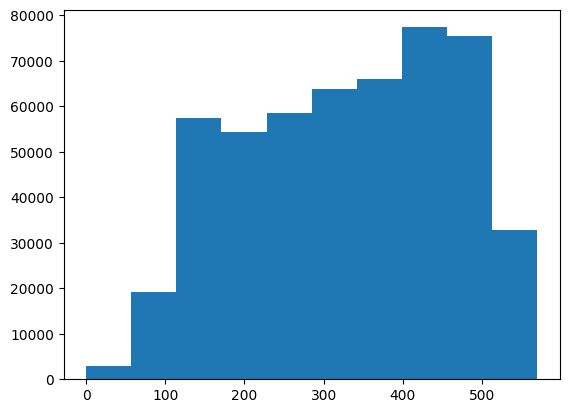

In [12]:
# Hier Code einfügen
plt.hist(df_data['m1_x_nose'])
plt.show()

plt.hist(df_data['m1_y_nose'])
plt.show()

plt.hist(df_data['m2_x_nose'])
plt.show()

plt.hist(df_data['m2_y_nose'])
plt.show()


Add some summary on data characteristics.


## 3 | Train Test Split

### 3.1 Tranform dataframe as needed for sklearn

Sklearn Algorithms are using an X-feature matrix and a y-label vector.

In [13]:
# Label: attack - binary classification
# Label: label - multi label classification
label = ['attack']
print('Used label: ', label)

# features List
mice = ['m1', 'm2']
coordinates = ['x', 'y']
# for processing time reducing the initial experiment to nose and tail
bodyparts = ['nose', 'tail_base'] #'left_ear', 'right_ear', 'neck', 'left_hip', 'right_hip',

features = []
for m in mice:
    for c in coordinates:
        for b in bodyparts:
            feature = m+'_'+c+'_'+b
            features.append(feature)

#features = ['m1_x_nose', 'm1_y_nose', 'm2_x_nose', 'm2_y_nose']
print('Used features: ', features)

y = np.ravel(df_data[label])
X = df_data[features]
X.columns

Used label:  ['attack']
Used features:  ['m1_x_nose', 'm1_x_tail_base', 'm1_y_nose', 'm1_y_tail_base', 'm2_x_nose', 'm2_x_tail_base', 'm2_y_nose', 'm2_y_tail_base']


Index(['m1_x_nose', 'm1_x_tail_base', 'm1_y_nose', 'm1_y_tail_base',
       'm2_x_nose', 'm2_x_tail_base', 'm2_y_nose', 'm2_y_tail_base'],
      dtype='object')

### 3.2 Train Test Split

LEarning with 70% Train data, holding out 30% of the data.

In [14]:
# Hier Code einfügen
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('Train/test split for the dataset is: ' ,len(X_train)/(len(X_train)+len(X_test)), ':', 1-len(X_train)/(len(X_train)+len(X_test)))




Train/test split for the dataset is:  0.6999988182881722 : 0.30000118171182777


## 3.2 Compare Train/Test
Checking if label and features are simularily distributed in both sets.

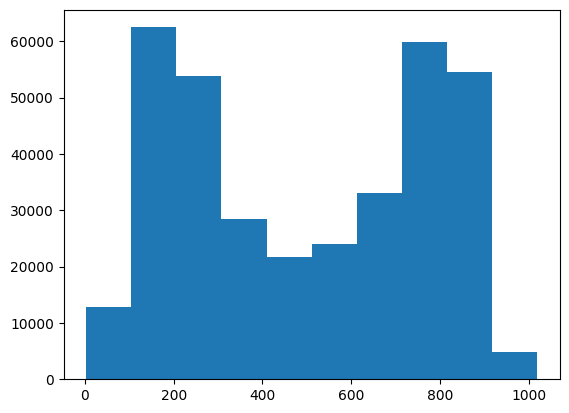

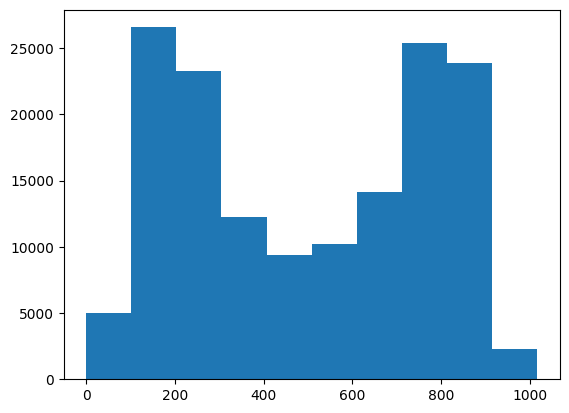

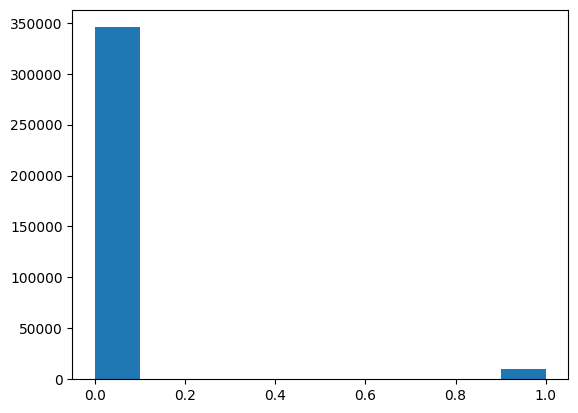

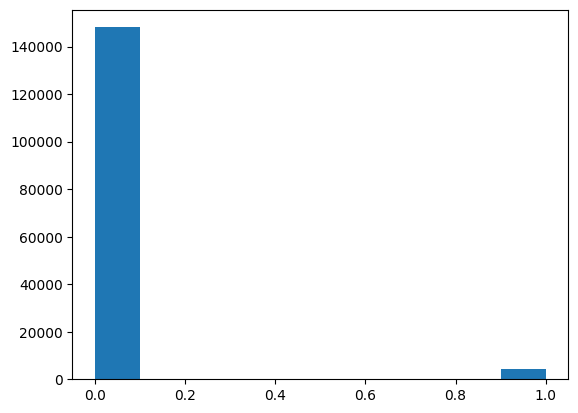

In [15]:
plt.hist(X_train['m1_x_nose'])
plt.show()

plt.hist(X_test['m1_x_nose'])
plt.show()

plt.hist(y_train)
plt.show()

plt.hist(y_test)
plt.show()

## 4 | Metrics for Evaluation


Selection of the metric is depending on the task, classification method and dataset characteristics.

Classification task is imbalanced (label is minority class). Accuracy can be misleading here.

Thus, the metrics F1 Score weighted and F1 Score will be compared for for the minority classes.


In [16]:
from sklearn.metrics import f1_score, precision_recall_curve

# unbalanciert
# multiclass --> umgewandelt auf binär (Label 0,1)

# to track results a table will be kept

results = []


Finding a balance of recall and precision:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

average{‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’
This parameter is required for multiclass/multilabel targets. If None, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

'binary':
Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

'samples':
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).



## 5 | Classification Methods

### 5.1 Dummy Classifier

Using a random generator to get a naive baseline and check if the following methods are better than chance.

class sklearn.dummy.DummyClassifier(*, strategy='prior', random_state=None, constant=None)[source]¶

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

strategy{“most_frequent”, “prior”, “stratified”, “uniform”, “constant”}, default=”prior”

“prior”: the predict method always returns the most frequent class label in the observed y argument passed to fit (like “most_frequent”). predict_proba always returns the empirical class distribution of y also known as the empirical class prior distribution.

Dummy Classifier Cross Val Score Mean:  0.9723507102909774
F1 Score weighted is:  0.9587159157768341
F1 Score by Class is:  0.985980188528519 0.0


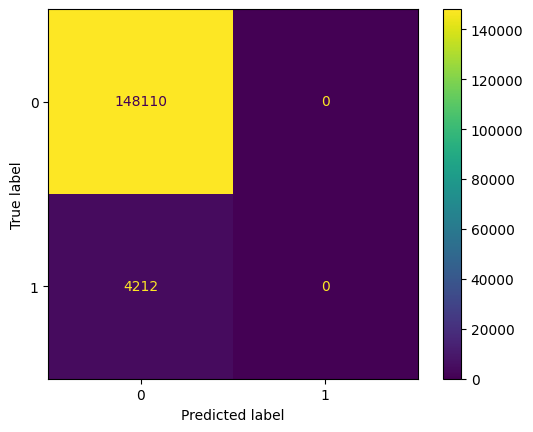

,Method,DataSet,CV_Score_Mean,F1_w,F1_0,F1_1
0,Dummy,Mouse_simple,0.972351,0.958716,0.98598,0.0


In [17]:
# Hier Code einfügen
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='prior')
dummy_clf.fit(X_train, y_train)
cv_score_mean = cross_val_score(dummy_clf, X_train, y_train, cv=10).mean()
print('Dummy Classifier Cross Val Score Mean: ',cv_score_mean)

dummy_predict = dummy_clf.predict(X_test)
f1_score_weighted = f1_score(y_test, dummy_predict, average='weighted')
print('F1 Score weighted is: ', f1_score_weighted)

f1_score_0 = f1_score(y_test, dummy_predict, average=None)[0]
f1_score_1 = f1_score(y_test, dummy_predict, average=None)[1]
print('F1 Score by Class is: ', f1_score_0, f1_score_1)

# dummy classifier confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, dummy_predict)
plt.show()

result = {'Method': 'Dummy',
          'DataSet': 'Mouse_simple',
          'CV_Score_Mean': cv_score_mean,
          'F1_w': f1_score_weighted,
          'F1_0': f1_score_0,
          'F1_1': f1_score_1}
results.append(result)

pd.DataFrame(results)


The dummy classifier does not recognize any minority class labels.

### 5.2 Baseline

Use a classic but simple method to determine a less naive baseline not only relying on chance..

### 5.2.1 Logistic Regression

class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

class_weightdict or ‘balanced’, default=None

Logistic Regression Cross Val Score Mean:  0.5727204145795575
LR F1 Score weighted is:  0.7051093367049063
LR F1 Score by Class is:  0.723225081316735 0.06809059633027523


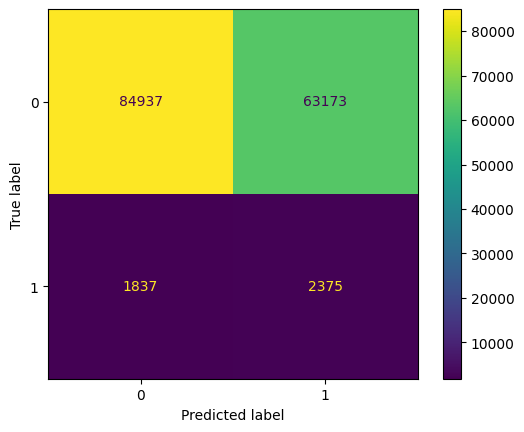

,Method,DataSet,CV_Score_Mean,F1_w,F1_0,F1_1
0,Dummy,Mouse_simple,0.972351,0.958716,0.985980,0.000000
1,LR,Mouse_simple,0.572720,0.705109,0.723225,0.068091


In [18]:
# Hier Code einfügen
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_clf.fit(X_train, y_train)
# needs to be checked with classweights to be fair?

cv_score_mean = cross_val_score(lr_clf, X_train, y_train, cv=10).mean()
print('Logistic Regression Cross Val Score Mean: ',cv_score_mean)

lr_predict = lr_clf.predict(X_test)
f1_score_weighted = f1_score(y_test, lr_predict, average='weighted')
print('LR F1 Score weighted is: ', f1_score_weighted)

f1_score_0 = f1_score(y_test, lr_predict, average=None)[0]
f1_score_1 = f1_score(y_test, lr_predict, average=None)[1]
print('LR F1 Score by Class is: ', f1_score_0, f1_score_1)

# dummy classifier confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, lr_predict)
plt.show()

result = {'Method': 'LR',
          'DataSet': 'Mouse_simple',
          'CV_Score_Mean': cv_score_mean,
          'F1_w': f1_score_weighted,
          'F1_0': f1_score_0,
          'F1_1': f1_score_1}
results.append(result)

pd.DataFrame(results)

### 5.2.2 | Random Forest

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]¶

class_weight{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None

Random Forest Cross Val Score Mean:  0.6747331774664261
RF F1 Score weighted is:  0.7779157957835596
RF F1 Score by Class is:  0.79695818103417 0.10831283294692318


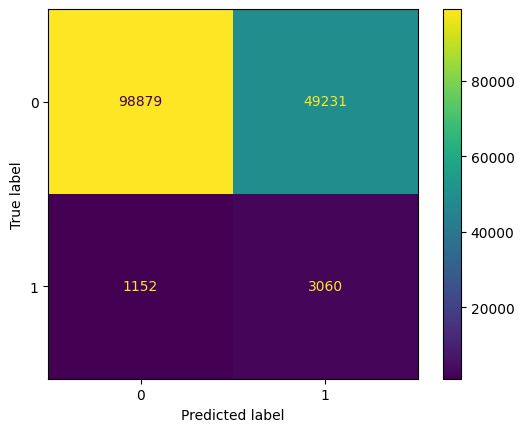

,Method,DataSet,CV_Score_Mean,F1_w,F1_0,F1_1
0,Dummy,Mouse_simple,0.972351,0.958716,0.985980,0.000000
1,LR,Mouse_simple,0.572720,0.705109,0.723225,0.068091
2,RF,Mouse_simple,0.674733,0.777916,0.796958,0.108313


In [19]:
# Hier Code einfügen
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=2, class_weight='balanced')
rf_clf.fit(X_train, y_train)
#ToDo: needs to be checked with classweights to be fair

cv_score_mean = cross_val_score(rf_clf, X_train, y_train, cv=10).mean()
print('Random Forest Cross Val Score Mean: ',cv_score_mean)

predict = rf_clf.predict(X_test)
f1_score_weighted = f1_score(y_test, predict, average='weighted')
print('RF F1 Score weighted is: ', f1_score_weighted)

f1_score_0 = f1_score(y_test, predict, average=None)[0]
f1_score_1 = f1_score(y_test, predict, average=None)[1]
print('RF F1 Score by Class is: ', f1_score_0, f1_score_1)

# dummy classifier confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predict)
plt.show()

result = {'Method': 'RF',
          'DataSet': 'Mouse_simple',
          'CV_Score_Mean': cv_score_mean,
          'F1_w': f1_score_weighted,
          'F1_0': f1_score_0,
          'F1_1': f1_score_1}
results.append(result)

pd.DataFrame(results)

The RF already detects a lot more of the minority classes and also misclassifies less of the majority labels.


### 5.2.3 Hist Gradient Boosting


Another statistically motivated method:


https://machinelearningmastery.com/histogram-based-gradient-boosting-ensembles/
Although gradient boosting performs very well in practice, the models can be slow to train. This is because trees must be created and added sequentially, unlike other ensemble models like random forest where ensemble members can be trained in parallel, exploiting multiple CPU cores. As such, a lot of effort has been put into techniques that improve the efficiency of the gradient boosting training algorithm.

Instead of finding the split points on the sorted feature values, histogram-based algorithm buckets continuous feature values into discrete bins and uses these bins to construct feature histograms during training. Since the histogram-based algorithm is more efficient in both memory consumption and training speed, we will develop our work on its basis.



class sklearn.ensemble.HistGradientBoostingClassifier(loss='log_loss', *, learning_rate=0.1, max_iter=100, max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0, max_bins=255, categorical_features=None, monotonic_cst=None, warm_start=False, early_stopping='auto', scoring='loss', validation_fraction=0.1, n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None)[source]¶

HGB Cross Val Score Mean:  0.978658804508672
HGB F1 Score weighted is:  0.9704584571097319
HGB F1 Score by Class is:  0.9884270469765034 0.33861423935865625


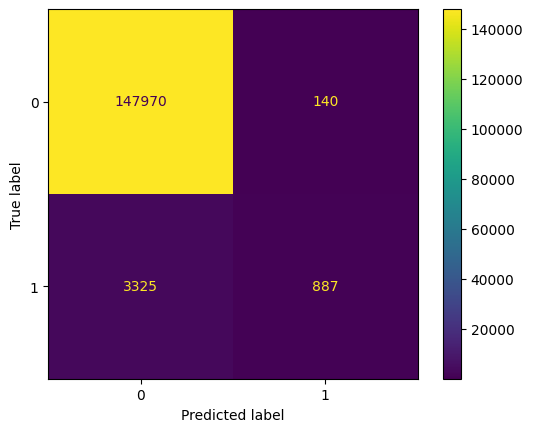

,Method,DataSet,CV_Score_Mean,F1_w,F1_0,F1_1
0,Dummy,Mouse_simple,0.972351,0.958716,0.985980,0.000000
1,LR,Mouse_simple,0.572720,0.705109,0.723225,0.068091
2,RF,Mouse_simple,0.674733,0.777916,0.796958,0.108313
3,HGB,Mouse_simple,0.978659,0.970458,0.988427,0.338614


In [20]:
#Hier Code einfügen

from sklearn.ensemble import HistGradientBoostingClassifier

hgb_clf = HistGradientBoostingClassifier(max_iter=1000)
hgb_clf.fit(X_train, y_train)

cv_score_mean = cross_val_score(hgb_clf, X_train, y_train, cv=10).mean()
print('HGB Cross Val Score Mean: ', cv_score_mean)

predict = hgb_clf.predict(X_test)
f1_score_weighted = f1_score(y_test, predict, average='weighted')
print('HGB F1 Score weighted is: ', f1_score_weighted)

f1_score_0 = f1_score(y_test, predict, average=None)[0]
f1_score_1 = f1_score(y_test, predict, average=None)[1]
print('HGB F1 Score by Class is: ', f1_score_0, f1_score_1)

# dummy classifier confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predict)
plt.show()

result = {'Method': 'HGB',
          'DataSet': 'Mouse_simple',
          'CV_Score_Mean': cv_score_mean,
          'F1_w': f1_score_weighted,
          'F1_0': f1_score_0,
          'F1_1': f1_score_1}
results.append(result)

pd.DataFrame(results)

HGB results have further improved the detection the minority class, while still classifying the majority class reasonably well.
HGB seems to be the most promising method.

## 6 |Optimising hyperparameters for the most promising method

Fitting 2 folds for each of 54 candidates, totalling 108 fits
Fitting 2 folds for each of 54 candidates, totalling 108 fits
Fitting 2 folds for each of 54 candidates, totalling 108 fits
Fitting 2 folds for each of 54 candidates, totalling 108 fits
Fitting 2 folds for each of 54 candidates, totalling 108 fits
Fitting 2 folds for each of 54 candidates, totalling 108 fits
Fitting 2 folds for each of 54 candidates, totalling 108 fits
Fitting 2 folds for each of 54 candidates, totalling 108 fits
Fitting 2 folds for each of 54 candidates, totalling 108 fits
Fitting 2 folds for each of 54 candidates, totalling 108 fits
Fitting 2 folds for each of 54 candidates, totalling 108 fits
HGB Grid Cross Val Score Mean:  0.03995885047219273
HGB Grid Set: F1 Score weighted is:  0.9587159157768341
HGB Grid Set: F1 Score pro Class is:  0.985980188528519 0.0


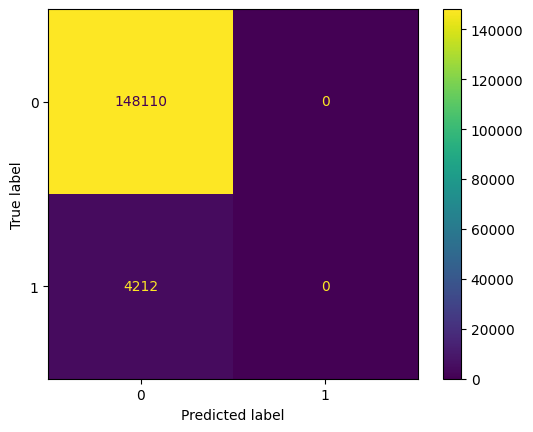


{'l2_regularization': 1.5, 'learning_rate': 0.1, 'max_depth': 25, 'max_iter': 100, 'max_leaf_nodes': 25, 'random_state': 1234, 'scoring': 'f1_weighted'}

0.0


,Method,DataSet,CV_Score_Mean,F1_w,F1_0,F1_1
0,Dummy,Mouse_simple,0.972351,0.958716,0.985980,0.000000
1,LR,Mouse_simple,0.572720,0.705109,0.723225,0.068091
2,RF,Mouse_simple,0.674733,0.777916,0.796958,0.108313
3,HGB,Mouse_simple,0.978659,0.970458,0.988427,0.338614
4,HGB Grid,Mouse_simple,0.039959,0.958716,0.985980,0.000000


In [21]:
params = {'max_iter': [100,120,150],  'learning_rate': [0.1],  'max_depth' : [25, 50, 75], 'max_leaf_nodes': [25, 30, 35],  'l2_regularization': [1.5],  'scoring': ['f1_weighted', 'f1'],
 'random_state' : [1234],
 }

#instantiate the gridsearch
hgb_grid = GridSearchCV(hgb_clf, params, n_jobs=2,
 cv=2, scoring='f1',
 verbose=2, refit=True)

#fit on the grid
hgb_grid.fit(X_train, y_train)

cv_score_mean = cross_val_score(hgb_grid, X_train, y_train, cv=10).mean()
print('HGB Grid Cross Val Score Mean: ',cv_score_mean)

predict = hgb_grid.predict(X_test)
f1_score_weighted = f1_score(y_test, predict, average='weighted')
print('HGB Grid Set: F1 Score weighted is: ', f1_score_weighted)

f1_score_0 = f1_score(y_test, predict, average=None)[0]
f1_score_1 = f1_score(y_test, predict, average=None)[1]
print('HGB Grid Set: F1 Score pro Class is: ', f1_score_0, f1_score_1)

# dummy classifier confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predict)
plt.show()

# Print the best parameters found
print()
print(hgb_grid.best_params_)

# Print the best scores found
print()
print(hgb_grid.best_score_)

result = {'Method': 'HGB Grid',
          'DataSet': 'Mouse_simple',
          'CV_Score_Mean': cv_score_mean,
          'F1_w': f1_score_weighted,
          'F1_0': f1_score_0,
          'F1_1': f1_score_1}

results.append(result)

pd.DataFrame(results)


Summary of Grid Search with optimized parameter selection

### 7 Summary

It can be shown, that several ML methods can detect a correlation between mouse data.
The naive approach to hyperparameter optimization has not yet improved the run with the default parameters. More time and resources would need to be spend to understand to what extend the results can be further improved.

In [22]:
pd.DataFrame(results)

,Method,DataSet,CV_Score_Mean,F1_w,F1_0,F1_1
0,Dummy,Mouse_simple,0.972351,0.958716,0.985980,0.000000
1,LR,Mouse_simple,0.572720,0.705109,0.723225,0.068091
2,RF,Mouse_simple,0.674733,0.777916,0.796958,0.108313
3,HGB,Mouse_simple,0.978659,0.970458,0.988427,0.338614
4,HGB Grid,Mouse_simple,0.039959,0.958716,0.985980,0.000000


Summary and next steps for these results. Would we want to use this approach for automated annotation?